# Imports

## Standards

In [159]:
# analysis
import pandas as pd
import numpy as np
from scipy import stats

# visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

## Machine Learning

### Preprocessing

In [160]:
# base
from sklearn.base import TransformerMixin, BaseEstimator

# pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

# compose
from sklearn.compose import ColumnTransformer

# preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures, OneHotEncoder

# feature selection
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, mutual_info_classif, f_classif, RFE, RFECV

# decomposition
from sklearn.decomposition import PCA, TruncatedSVD, SparsePCA

# manifold
from sklearn.manifold import Isomap, TSNE, MDS, SpectralEmbedding

### Modeling

In [161]:
# cluster
from sklearn.cluster import OPTICS, AffinityPropagation, AgglomerativeClustering, DBSCAN, KMeans, MeanShift

# ensemble
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier

# logistic regression
from sklearn.linear_model import LogisticRegression, SGDClassifier

# naive bayes
from sklearn.naive_bayes import MultinomialNB

# process classifier
from sklearn.gaussian_process import GaussianProcessClassifier

# neighbors
from sklearn.neighbors import KNeighborsClassifier

# neural networks
from sklearn.neural_network import MLPClassifier

# support vector machines
from sklearn.svm import LinearSVC, SVC

# multiclass
from sklearn.multiclass import OneVsRestClassifier

# train test split, tuning, and score validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# classification report
from sklearn.metrics import classification_report

# Classifiers

In [162]:
classifiers = {
    'AdaBoostClassifier' : AdaBoostClassifier(random_state=0),
    'GradientBoostingClassifier' : GradientBoostingClassifier(random_state=0),
    'ExtraTreesClassifier' : ExtraTreesClassifier(n_estimators=100, random_state=0),
    'RandomForestClassifier' : RandomForestClassifier(n_estimators=100, random_state=0),
    'LogisticRegression' : LogisticRegression(solver='lbfgs', multi_class='auto', random_state=0, max_iter=500),
    'MultinomialNB' : MultinomialNB(),
    'GaussianProcessClassifier' : GaussianProcessClassifier(random_state=0),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'MLPClassifier' : MLPClassifier(random_state=0, max_iter=1500),
    'LinearSVC' : LinearSVC(random_state=0, max_iter=2000),
    'SVC' : SVC(gamma='scale', random_state=0),
    'SGDClassifier' : SGDClassifier(random_state=0),
}

# Ensembles

In [163]:
ensembles = {
    'AdaBoostClassifier' : AdaBoostClassifier(random_state=0),
    'GradientBoostingClassifier' : GradientBoostingClassifier(random_state=0),
    'ExtraTreesClassifier' : ExtraTreesClassifier(n_estimators=100, random_state=0),
    'RandomForestClassifier' : RandomForestClassifier(n_estimators=100, random_state=0),
}

# Data

In [164]:
# read training data
train = pd.read_csv("train.csv")

In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [166]:
train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [167]:
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


# Goal
Predict `type` of creature.

In [168]:
train.type.value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [169]:
train.set_index('id', inplace=True)

X = train.drop(columns='type')
y = train.type

X_obj = X.select_dtypes(include=['O'])

X_num = X.select_dtypes(exclude=['O'])

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe_obj = ohe.fit_transform(X_obj)

X_obj = pd.DataFrame(
    data=ohe_obj,
    index=X_obj.index,
    columns=ohe.get_feature_names(X_obj.columns)
)

X = X_num.join(X_obj)

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [171]:
rscv = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions={
        'criterion' : ['entropy'],
        'splitter' : ['best'],
        'max_depth' : stats.randint(2, 100),
        'min_samples_split' : stats.uniform(1e-3,0.4),
        'min_samples_leaf' : stats.uniform(1e-3,0.4),
        'min_weight_fraction_leaf' : stats.uniform(0,0.35),
        'max_features' : [None],
        'random_state' : [0],
        'max_leaf_nodes' : stats.randint(2, 100),
        'min_impurity_decrease' : stats.uniform(1e-3,0.15),
        'class_weight' : ['balanced'],
        'ccp_alpha' : stats.uniform(1e-3,0.2),
    },
    n_iter=1000,
    n_jobs=-1,
    cv=10,
    verbose=True,
    random_state=0,
)

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [173]:
rscv.fit(X_train, y_train)

print(f"Training Score: {rscv.best_score_}")

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 6680 tasks      | elapsed:   18.5s


Training Score: 0.655846153846154


[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   27.8s finished


In [174]:
rscv.score(X_train, y_train)

0.6718146718146718

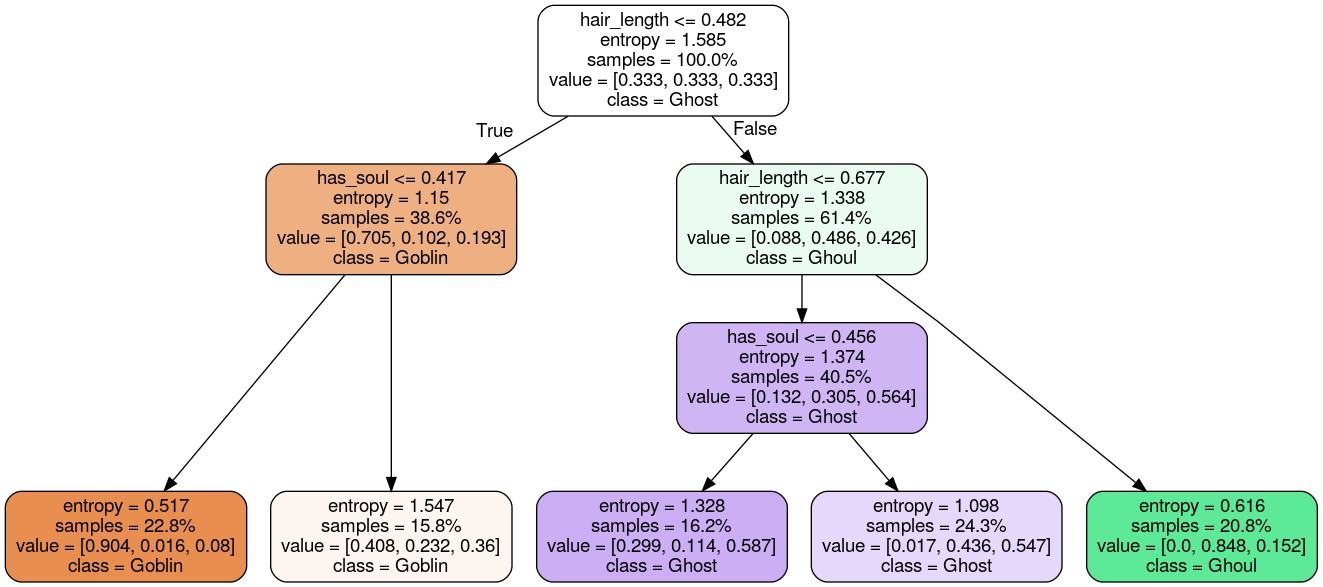

In [175]:
from sklearn import tree

tree.export_graphviz(
    decision_tree=rscv.best_estimator_,
    out_file='rscv_dec_tree.dot',
    feature_names=X_train.columns,
    class_names=y_train.unique(),
    filled=True,
    leaves_parallel=True,
    proportion=True,
    rounded=True,
)

!dot -Tpng rscv_dec_tree.dot -o rscv_dec_tree.png

from IPython.display import Image

Image(filename='rscv_dec_tree.png')

In [176]:
rscv.best_estimator_.tree_.threshold

array([ 0.48177597,  0.41742998, -2.        , -2.        ,  0.67697027,
        0.45574903, -2.        , -2.        , -2.        ])

In [177]:
def hair_len_bins(df):
    
    df['hair_len_bins'] = df.hair_length.map(
        lambda x : 0 if x <= 0.48177597 else 0.5 if x <= 0.67697027 else 1
    )
    
    return df

In [178]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=3, include_bias=False,))
])

from sklearn.feature_selection import VarianceThreshold

pipe.steps.append(['var', VarianceThreshold(threshold=0)])

pipe_train = pipe.fit_transform(X_train)

pipe_train = pd.DataFrame(
    data=pipe_train,
    index=X_train.index,
    columns=np.array(pipe.steps[0][1].get_feature_names(X_train.columns))[pipe.steps[1][1].get_support()]
)

In [206]:
rscv = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions={
        'criterion' : ['entropy'],
        'splitter' : ['best'],
        'max_depth' : stats.randint(2, 100),
        'min_samples_split' : stats.uniform(1e-3,0.4),
        'min_samples_leaf' : stats.uniform(1e-3,0.4),
        'min_weight_fraction_leaf' : stats.uniform(0,0.35),
        'max_features' : [None],
        'random_state' : [0],
        'max_leaf_nodes' : stats.randint(2, 100),
        'min_impurity_decrease' : stats.uniform(1e-3,0.15),
        'class_weight' : ['balanced'],
        'ccp_alpha' : stats.uniform(1e-3,0.2),
    },
    n_iter=1000,
    n_jobs=-1,
    cv=10,
    verbose=True,
    random_state=0,
)

In [207]:
rscv.fit(pipe_train, y_train)

print(f"Training Score: {rscv.best_score_}")

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1260 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 3260 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 6060 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 9660 tasks      | elapsed:   46.7s


Training Score: 0.695076923076923


[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   48.2s finished


In [208]:
rscv.best_params_

{'ccp_alpha': 0.014614814794944041,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 75,
 'max_features': None,
 'max_leaf_nodes': 56,
 'min_impurity_decrease': 0.038978679058427786,
 'min_samples_leaf': 0.05342209248610311,
 'min_samples_split': 0.005814489159061708,
 'min_weight_fraction_leaf': 0.040419503998561826,
 'random_state': 0,
 'splitter': 'best'}

In [210]:
rscv.score(pipe_train, y_train)

0.7992277992277992

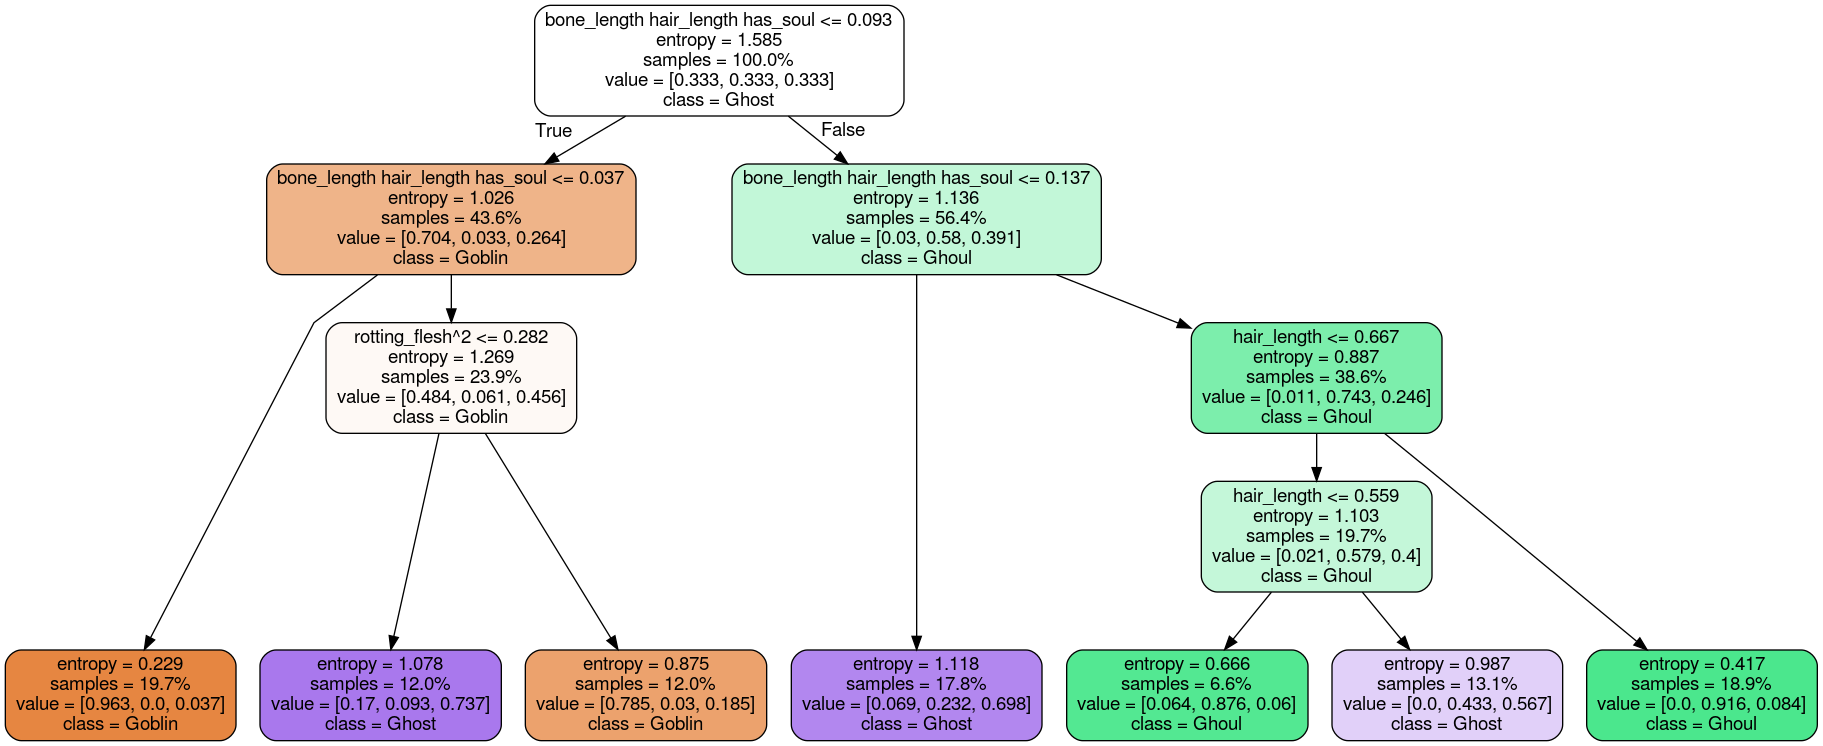

In [212]:
tree.export_graphviz(
    decision_tree=rscv.best_estimator_,
    out_file='rscv_dec_tree.dot',
    feature_names=pipe_train.columns,
    class_names=y_train.unique(),
    filled=True,
    leaves_parallel=True,
    proportion=True,
    rounded=True,
)

!dot -Tpng rscv_dec_tree.dot -o rscv_dec_tree.png

Image(filename='rscv_dec_tree.png')

In [218]:
from sklearn.metrics import classification_report, confusion_matrix

In [215]:
pipe_test = pipe.transform(X_test)

In [226]:
rscv.best_estimator_.fit(pipe_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014614814794944041, class_weight='balanced',
                       criterion='entropy', max_depth=75, max_features=None,
                       max_leaf_nodes=56,
                       min_impurity_decrease=0.038978679058427786,
                       min_impurity_split=None,
                       min_samples_leaf=0.05342209248610311,
                       min_samples_split=0.005814489159061708,
                       min_weight_fraction_leaf=0.040419503998561826,
                       presort='deprecated', random_state=0, splitter='best')

In [227]:
print(classification_report(y_test, rscv.best_estimator_.predict(pipe_test), labels=y_test.unique(), target_names=y_test.unique()))

              precision    recall  f1-score   support

       Ghost       0.83      0.71      0.77        35
       Ghoul       0.79      0.59      0.68        39
      Goblin       0.55      0.76      0.64        38

    accuracy                           0.69       112
   macro avg       0.72      0.69      0.69       112
weighted avg       0.72      0.69      0.69       112



In [228]:
pd.DataFrame(
    data=confusion_matrix(y_test, rscv.best_estimator_.predict(pipe_test), labels=y_test.unique()),
    columns=pd.MultiIndex.from_product([['Predicted'], y_test.unique()]),
    index=pd.MultiIndex.from_product([['Actual'], y_test.unique()])
)

Predicted             
                  Ghost Ghoul Goblin
Actual Ghost         25     0     10
       Ghoul          2    23     14
       Goblin         3     6     29

# Test

In [232]:
from sklearn.preprocessing import RobustScaler

from sklearn.feature_selection import SelectPercentile, chi2, f_classif, mutual_info_classif

from functools import partial

In [235]:
class SelectPercentileMI(SelectPercentile):
    def __init__(self, percentile=10, n_neighbors=3):
        self.n_neighbors=n_neighbors
        super().__init__(percentile=percentile,
                         score_func=partial(mutual_info_classif, n_neighbors=3))

In [246]:
pipe = Pipeline(steps=[
    ('scale', RobustScaler()),
    ('var0', VarianceThreshold()),
    ('poly', PolynomialFeatures()),
    ('var1', VarianceThreshold()),
    ('select', 'passthrough')
])

params0 = {
    'scale__with_centering' : [True, False],
    'scale__with_scaling' : [True, False],
    'var0__threshold' : stats.uniform(0,0.5),
    'poly__degree' : stats.randint(2, 5),
    'poly__interaction_only' : [True, False],
    'poly__include_bias' : [True, False],
    'var1__threshold' : stats.uniform(0, 0.5),
}

params = [
    {
        **params0,
        'select' : [SelectPercentile()],
        'select__score_func' : [chi2, f_classif],
        'select__percentile' : stats.randint(1,100),
    },
    {
        **params0,
        'select' : [SelectPercentileMI()],
        'select__percentile' : stats.randint(1,100),
        'select__n_neighbors' : stats.randint(2,50),
    },
]

In [ ]:
from sklearn.ensemble import 

# Stuff

In [109]:
train['bl_q'] = np.where(
    train.bone_length < train.bone_length.quantile(0.25),
    0,
    np.where(
        train.bone_length > train.bone_length.quantile(0.75),
        2, 1
    )
)

In [110]:
train['rf_q'] = np.where(
    train.rotting_flesh < train.rotting_flesh.quantile(0.25),
    0,
    np.where(
        train.rotting_flesh > train.rotting_flesh.quantile(0.75),
        2, 1
    )
)

In [111]:
train['hl_q'] = np.where(
    train.hair_length < train.hair_length.quantile(0.25),
    0,
    np.where(
        train.hair_length > train.hair_length.quantile(0.75),
        2, 1
    )
)

In [112]:
train['hs_q'] = np.where(
    train.has_soul < train.has_soul.quantile(0.25),
    0,
    np.where(
        train.has_soul > train.has_soul.quantile(0.75),
        2, 1
    )
)

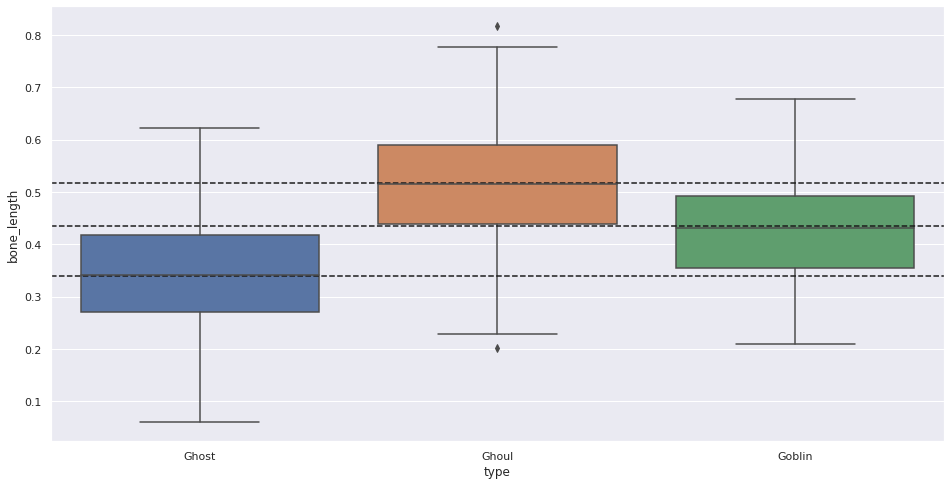

In [144]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(
    data=train,
    x='type',
    y='bone_length',
    ax=ax,
    order=train.type.sort_values().unique()
)

ax.axhline(train.bone_length.quantile(0.25), c='k', ls='--')
ax.axhline(train.bone_length.quantile(0.50), c='k', ls='--')
ax.axhline(train.bone_length.quantile(0.75), c='k', ls='--');

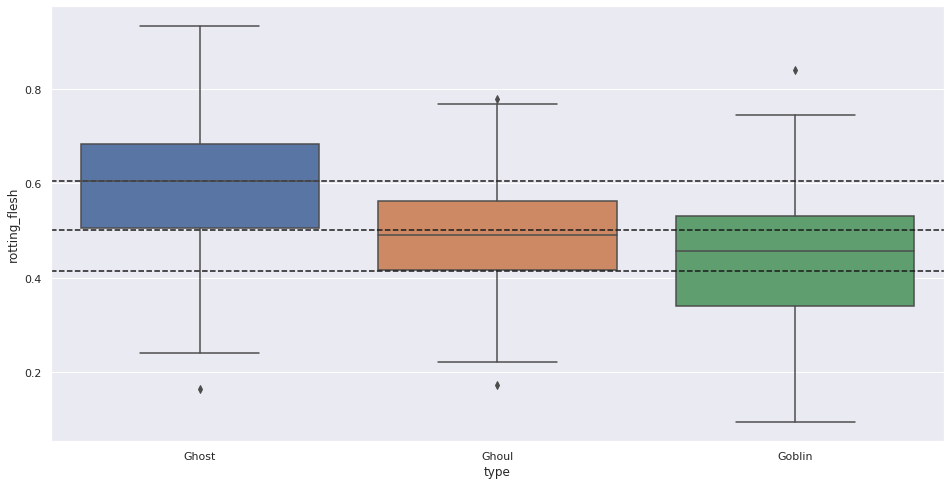

In [143]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(
    data=train,
    x='type',
    y='rotting_flesh',
    ax=ax,
    order=train.type.sort_values().unique()
)

ax.axhline(train.rotting_flesh.quantile(0.25), c='k', ls='--')
ax.axhline(train.rotting_flesh.quantile(0.50), c='k', ls='--')
ax.axhline(train.rotting_flesh.quantile(0.75), c='k', ls='--');

In [138]:
train.groupby([
    'type',
    'hl_q',
]).id.nunique().unstack().apply(lambda x : x/x.sum(), axis=1)

hl_q,0,1,2
type,,,
Ghost,0.598291,0.401709,NaN
Ghoul,0.031008,0.418605,0.550388
Goblin,0.152000,0.672000,0.176000


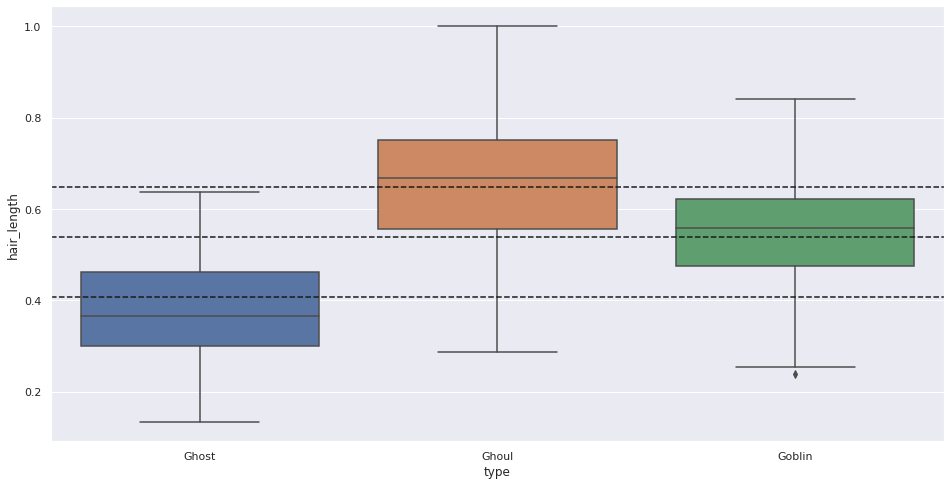

In [141]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(
    data=train,
    x='type',
    y='hair_length',
    ax=ax,
    order=train.type.sort_values().unique()
)

ax.axhline(train.hair_length.quantile(0.25), c='k', ls='--')
ax.axhline(train.hair_length.quantile(0.50), c='k', ls='--')
ax.axhline(train.hair_length.quantile(0.75), c='k', ls='--');

In [139]:
train.groupby([
    'type',
    'hs_q',
]).id.nunique().unstack().apply(lambda x : x/x.sum(), axis=1)

hs_q,0,1,2
type,,,
Ghost,0.589744,0.384615,0.025641
Ghoul,0.023256,0.480620,0.496124
Goblin,0.168000,0.624000,0.208000


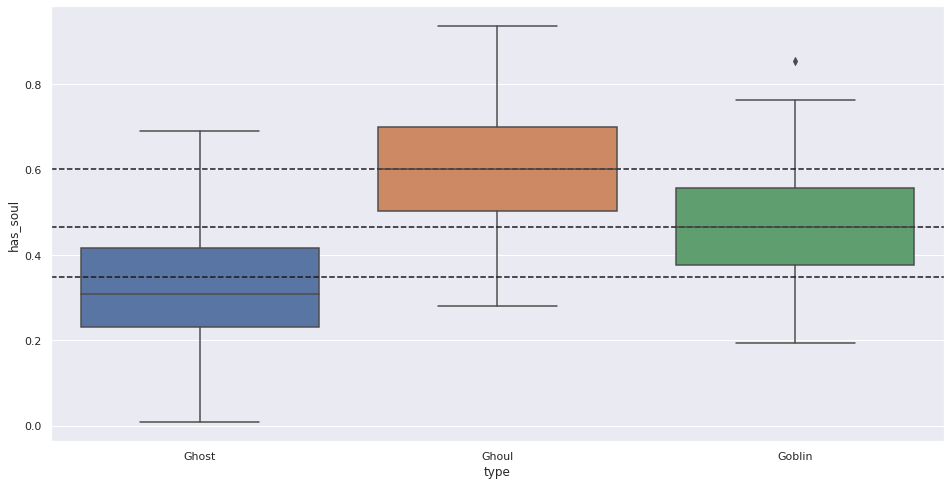

In [140]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(
    data=train,
    x='type',
    y='has_soul',
    ax=ax,
    order=train.type.sort_values().unique()
)

ax.axhline(train.has_soul.quantile(0.25), c='k', ls='--')
ax.axhline(train.has_soul.quantile(0.50), c='k', ls='--')
ax.axhline(train.has_soul.quantile(0.75), c='k', ls='--');

In [78]:
t = train.reindex(columns=[
    'bone_length',
    'rotting_flesh',
    'hair_length',
    'has_soul',
    'type',
])

In [79]:
# t = t.melt(id_vars='type')

In [76]:
t['_neg_prod'] = pd.DataFrame(
    data=MinMaxScaler((-1,1)).fit_transform(t.drop(columns=['type'])),
    columns=t.drop(columns=['type']).columns
).prod(axis=1)

In [80]:
t['_prod'] = t.drop(columns=[
    'type'
]).prod(axis=1)

type
Ghost     AxesSubplot(0.125,0.125;0.775x0.755)
Ghoul     AxesSubplot(0.125,0.125;0.775x0.755)
Goblin    AxesSubplot(0.125,0.125;0.775x0.755)
Name: _prod, dtype: object

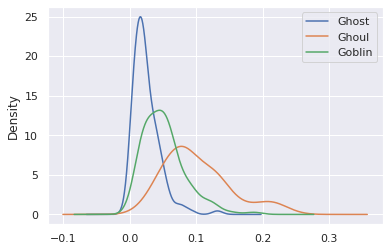

In [83]:
t.groupby(['type'])._prod.plot.kde(legend=True)

In [18]:
ghoul = t.loc[
    t.type == 'Ghoul'
].copy()

/home/ian/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


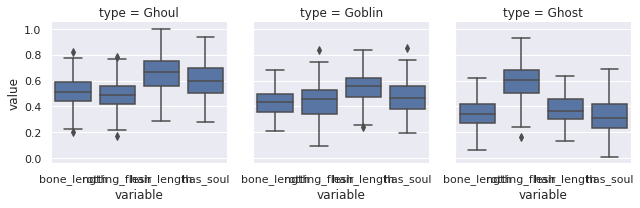

In [50]:
g = sns.FacetGrid(
    data=t,
    col='type',
s)

g.map(sns.boxplot, 'variable', 'value')

(0, 1.1)

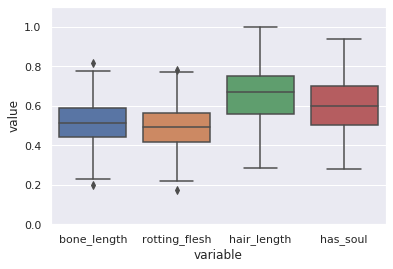

In [35]:
sns.boxplot(
    data=ghoul.drop(columns='type').melt(),
    x='variable',
    y='value'
)

plt.ylim(0, 1.1)

In [19]:
ghost = t.loc[
    t.type == 'Ghost'
].copy()

(0, 1.1)

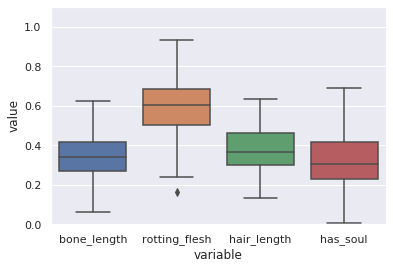

In [36]:
sns.boxplot(
    data=ghost.drop(columns='type').melt(),
    x='variable',
    y='value'
)

plt.ylim(0, 1.1)

In [20]:
goblin = t.loc[
    t.type == 'Goblin'
].copy()

(0, 1.1)

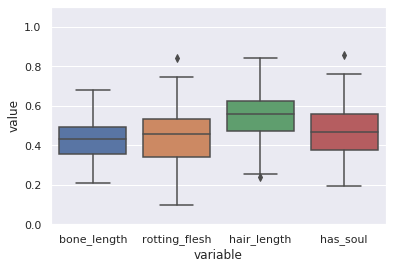

In [37]:
sns.boxplot(
    data=goblin.drop(columns='type').melt(),
    x='variable',
    y='value'
)

plt.ylim(0, 1.1)

In [335]:
train.groupby('type').bone_length.median()

type
Ghost     0.340442
Ghoul     0.515397
Goblin    0.430797
Name: bone_length, dtype: float64

In [336]:
train.groupby('type').bone_length.mean()

type
Ghost     0.347466
Ghoul     0.517159
Goblin    0.429650
Name: bone_length, dtype: float64

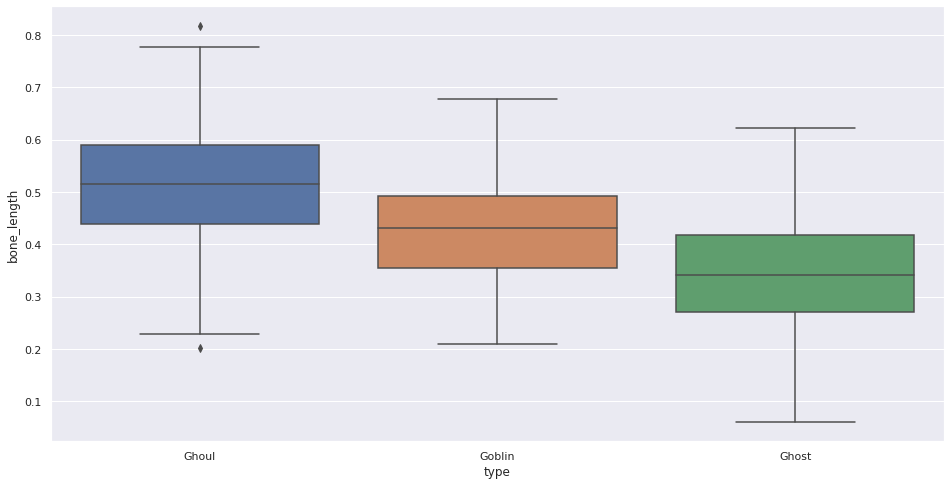

In [334]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(
    data=train,
    y='bone_length',
    x='type',
    ax=ax,
)

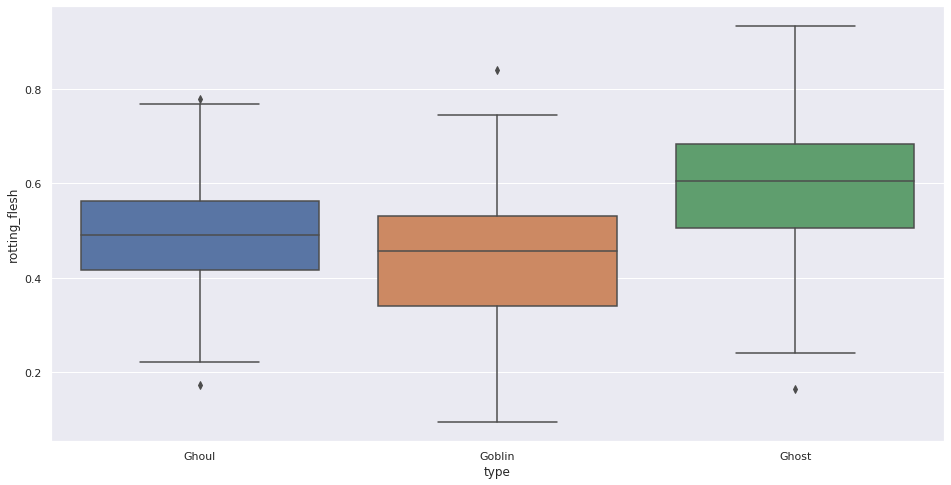

In [338]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(
    data=train,
    y='rotting_flesh',
    x='type',
    ax=ax,
)

In [342]:
train['feature_sum'] = train.reindex(columns=[
    'bone_length',
    'rotting_flesh',
    'hair_length',
    'has_soul',
]).sum(axis=1)

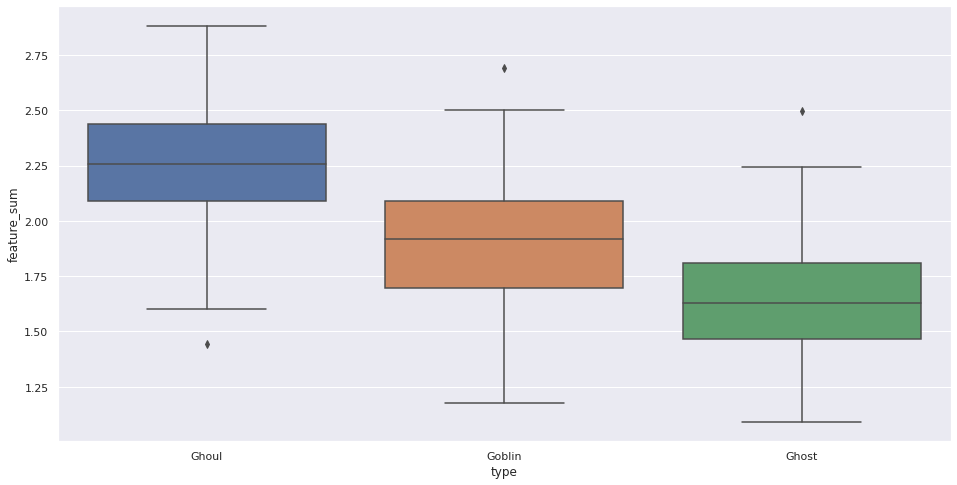

In [344]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(
    data=train,
    y='feature_sum',
    x='type',
    ax=ax,
)

In [337]:
train.columns

Index(['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color', 'type'],
      dtype='object')

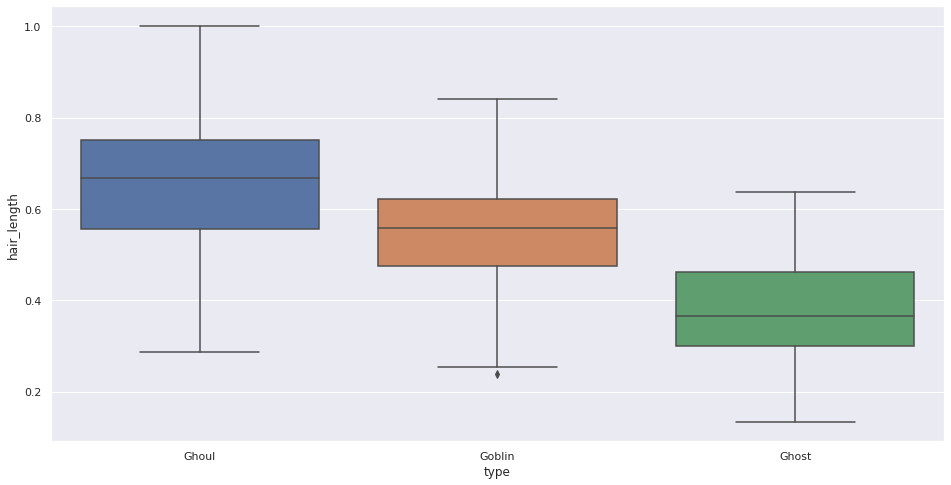

In [339]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(
    data=train,
    y='hair_length',
    x='type',
    ax=ax,
)

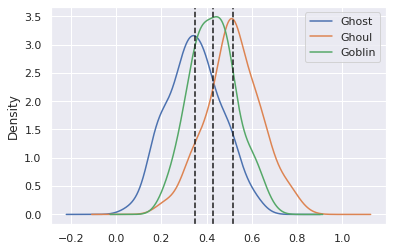

In [324]:
train.groupby([
    'type',
]).bone_length.plot.kde(legend=True)

for i in train.groupby('type').bone_length.mean():
    plt.axvline(i, c='k', ls='--');

In [329]:
train.columns

Index(['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color', 'type'],
      dtype='object')

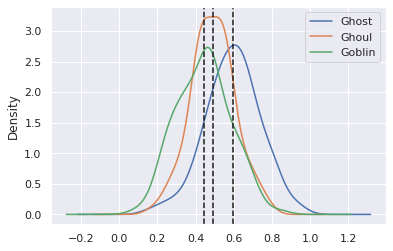

In [330]:
train.groupby([
    'type',
]).rotting_flesh.plot.kde(legend=True)

for i in train.groupby('type').rotting_flesh.mean():
    plt.axvline(i, c='k', ls='--');

In [327]:
stats.normaltest(train.loc[
    train.type == 'Ghost',
    'bone_length'
])

NormaltestResult(statistic=1.438324568785459, pvalue=0.4871601867628075)

In [316]:
train.drop(columns=[
    'id'
]).select_dtypes(exclude=['O']).corr()

,bone_length,rotting_flesh,hair_length,has_soul
bone_length,1.000000,-0.041716,0.353881,0.381675
rotting_flesh,-0.041716,1.000000,-0.220353,-0.132051
hair_length,0.353881,-0.220353,1.000000,0.474835
has_soul,0.381675,-0.132051,0.474835,1.000000


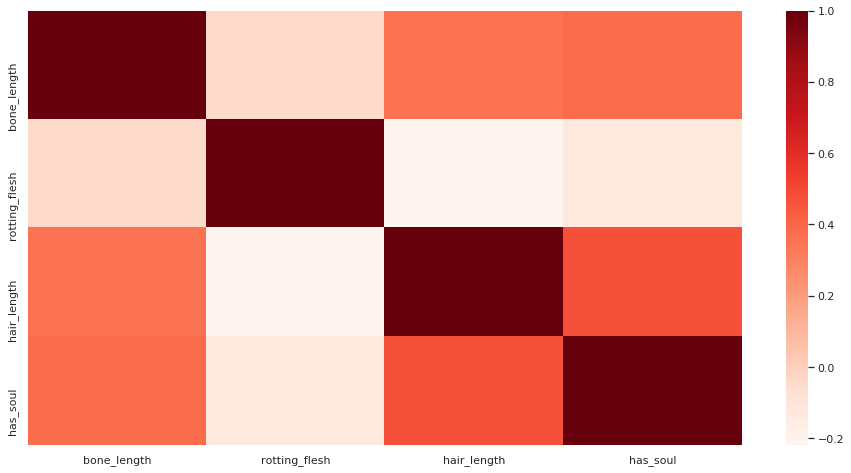

In [320]:
fig, ax = plt.subplots(figsize=(16,8))

sns.heatmap(
    data=train.drop(columns=[
        'id'
    ]).select_dtypes(exclude=['O']).corr(),
    cmap='Reds',
    ax=ax,
)

In [245]:
ohe_color = OneHotEncoder(drop='first', sparse=False)

In [246]:
train = train.join(pd.DataFrame(
    data=ohe_color.fit_transform(train.color.values.reshape(-1,1)),
    columns=ohe_color.get_feature_names()
))

In [248]:
# # get dummy color features
# train = train.join(pd.get_dummies(train.color))

In [249]:
# # create empty list to hold combinations of colors
# c = []

# # create combinations of color features (min 2, max nunique colors - 1)
# for i in range(2, train.color.nunique()):
#     els = [list(x) for x in combinations(train.color.unique(), i)]
#     c.extend(els)

# # sum the combinations and add new column to train
# for i in c:
#     train['_'.join(i)] = train[i].sum(axis=1)

# EDA

## `train_test_split`

In [294]:
X = train.drop(columns=[
    'id',
    'color',
    'type',
])

y = train.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

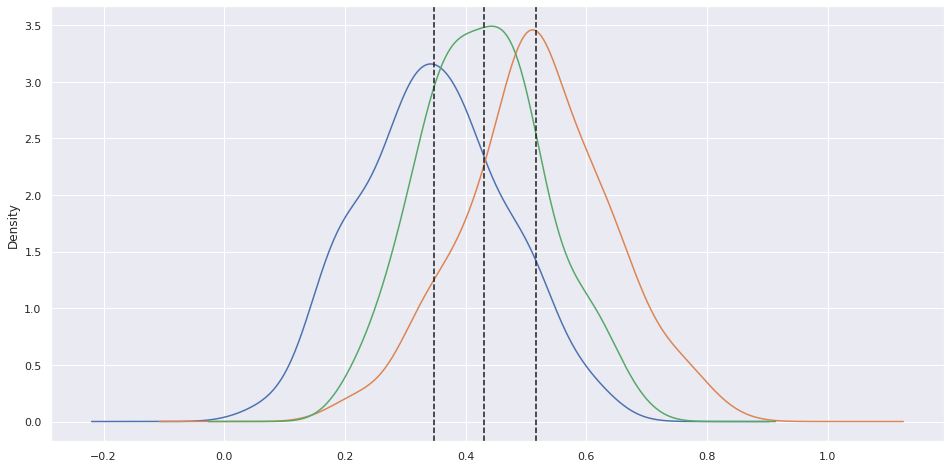

In [303]:
fig, ax = plt.subplots(figsize=(16,8))

train.groupby([
    'type',
]).bone_length.plot.kde(ax=ax);

for i in train.groupby([
    'type',
]).bone_length.mean().values:
    ax.axvline(i, c='k', ls='--')

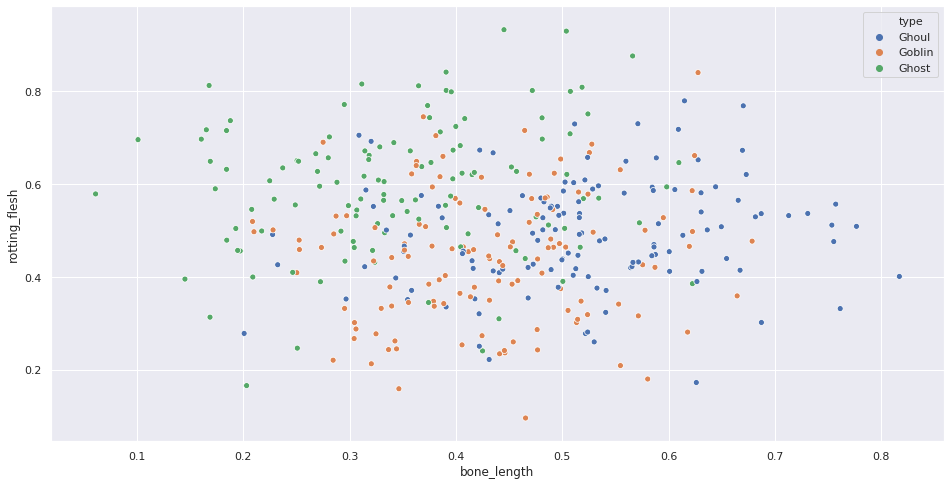

In [297]:
fig, ax = plt.subplots(figsize=(16,8))

sns.kdeplot(
    data=train,
    x='bone_length',
    y='rotting_flesh',
    hue='type',
    ax=ax
)

In [288]:
# X_tsne = TSNE(random_state=0).fit_transform(StandardScaler().fit_transform(X))
X_tsne = TSNE(random_state=0).fit_transform(StandardScaler(with_mean=False).fit_transform(X))
# X_tsne = TSNE(random_state=0).fit_transform(MinMaxScaler().fit_transform(X))
# X_tsne = TSNE(random_state=0).fit_transform(MinMaxScaler(feature_range=(-1,1)).fit_transform(X))
# X_tsne = TSNE(random_state=0).fit_transform(RobustScaler().fit_transform(X))
# X_tsne = TSNE(random_state=0).fit_transform(RobustScaler(with_centering=False).fit_transform(X))

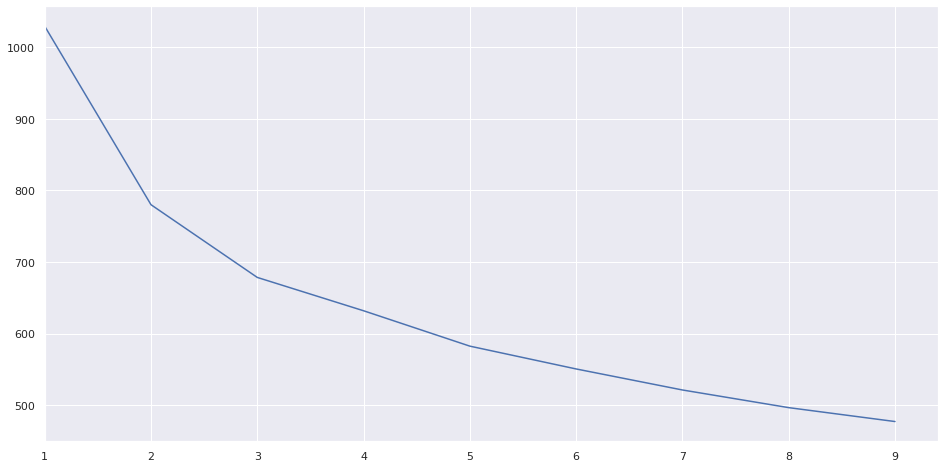

In [289]:
sse = {}

for k in range(1, 10):
    sse[k] = KMeans(n_clusters=k, random_state=0).fit(RobustScaler().fit_transform(X)).inertia_

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(list(sse.keys()), list(sse.values()))

# ax.axvline(6, c='r')

ax.set_xlim(1);

In [290]:
ohe = OneHotEncoder(drop='first', sparse=False)

X = X.join(pd.DataFrame(
#     data=ohe.fit_transform(KMeans(n_clusters=3, random_state=0).fit_predict(X).reshape(-1,1)),
    data=KMeans(n_clusters=2, random_state=0).fit_predict(X),
#     columns=['km_ohe0', 'km_ohe1',]
    columns=['km']
))

In [291]:
# X_tsne = TSNE(random_state=0).fit_transform(StandardScaler().fit_transform(X))
X_tsne = TSNE(random_state=0).fit_transform(StandardScaler(with_mean=False).fit_transform(X))
# X_tsne = TSNE(random_state=0).fit_transform(MinMaxScaler().fit_transform(X))
# X_tsne = TSNE(random_state=0).fit_transform(MinMaxScaler(feature_range=(-1,1)).fit_transform(X))
# X_tsne = TSNE(random_state=0).fit_transform(RobustScaler().fit_transform(X))
# X_tsne = TSNE(random_state=0).fit_transform(RobustScaler(with_centering=False).fit_transform(X))

In [292]:
train.groupby([
    'color',
    'type',
]).id.nunique().unstack().apply(lambda x : x/x.sum(), axis=1).style.background_gradient(axis=0)

type,Ghost,Ghoul,Goblin
color,,,
black,0.341463,0.341463,0.317073
blood,0.500000,0.333333,0.166667
blue,0.315789,0.315789,0.368421
clear,0.266667,0.350000,0.383333
green,0.357143,0.309524,0.333333
white,0.321168,0.364964,0.313869


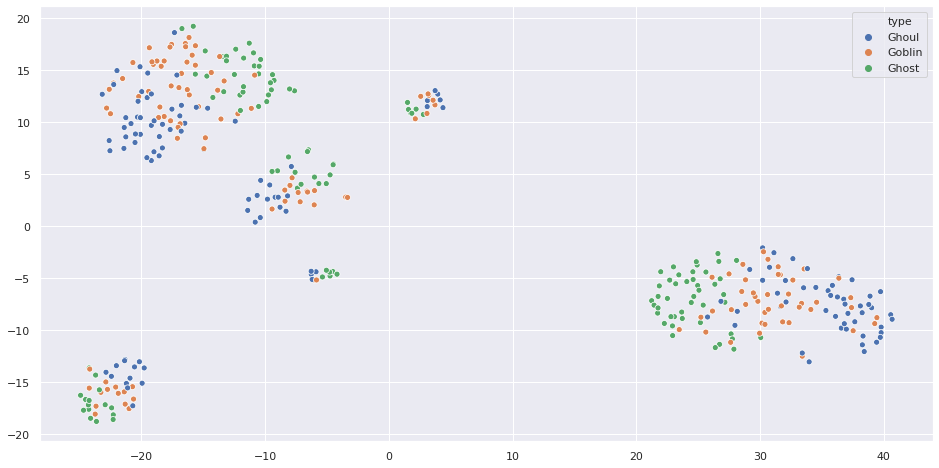

In [293]:
fig, ax = plt.subplots(figsize=(16,8))

sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=y
);

## Pipe

### Cleaner

In [273]:
class ScalerSwap(BaseEstimator):
    
    def __init__(self, scaler = StandardScaler()):
        """
        A Custom BaseEstimator that can switch between scalers.
        :param estimator: sklearn object - The scaler
        """ 
        
        self.scaler = scaler

    def fit(self, X, y=None, **kwargs):
        self.scaler.fit(X, y)
        return self

    def transform(self, X, **kwargs):
        self.scaler.transform(X)
        return self

In [274]:
pipe_cleaner = Pipeline([
    ('poly', PolynomialFeatures()),
#     ('scaler', ScalerSwap()),
    ('scaler', StandardScaler()),
    ('vt', VarianceThreshold()),
])

cleaner_params = {
    'cleaner__poly__degree' : stats.distributions.randint(2, 4+1),
    'cleaner__poly__include_bias' : [True, False],
    'cleaner__poly__interaction_only' : [True, False],
    'cleaner__vt__threshold' : stats.distributions.uniform(0.0, 2e-2),
}

scaler_params = [
    {
#         'cleaner__scaler__scaler' : [StandardScaler()],
#         'cleaner__scaler__scaler__with_mean' : [True, False],
#         'cleaner__scaler__scaler__with_std' : [True, False],
        'cleaner__scaler__with_mean' : [True, False],
        'cleaner__scaler__with_std' : [True, False],
    },
#     {
#         'cleaner__scaler__scaler' : [MinMaxScaler()],
#         'cleaner__scaler__scaler__feature_range' : [(0,1), (-1,1), (-0.5, 0.5)],
#     },
#     {
#         'cleaner__scaler__scaler' : [RobustScaler()],
#         'cleaner__scaler__scaler__with_centering' : [True, False],
#         'cleaner__scaler__scaler__with_scaling' : [True, False],
#     }
]

cleaner_params = {**cleaner_params, **np.random.choice(scaler_params)}

### Decomposition

In [275]:
pipe_decomp = Pipeline([
    ('union', FeatureUnion([
        ('pca', PCA(random_state=0)),
        ('svd', TruncatedSVD(random_state=0))
    ], n_jobs=-1))
])

decomp_params = {
    'decomp__union__pca__n_components' : stats.distributions.uniform(0.5, 0.5),
    'decomp__union__pca__whiten' : [True, False],
#     'decomp__union__pca__svd_solver' : ['auto', 'full', 'arpack', 'randomized'],
    'decomp__union__pca__tol' : stats.distributions.uniform(0.0, 0.5),
    'decomp__union__svd__n_components' : stats.distributions.randint(2, 50),
    'decomp__union__svd__algorithm' : ['randomized', 'arpack'],
    'decomp__union__svd__n_iter' : stats.distributions.randint(5, 15),
    'decomp__union__svd__tol' : stats.distributions.uniform(0.0, 0.5),
}

### Unsupervised Clustering

In [276]:
class ModelTransformer(TransformerMixin, BaseEstimator):
    
    def __init__(self, model):
        self.model = model
    
    def fit(self, *args, **kwargs):
        self.model.fit(*args, **kwargs)
        return self
    
    def transform(self, X, **transform_params):
        return pd.DataFrame(self.model.fit_predict(X))

pipe_cluster = Pipeline([
    ('union', FeatureUnion([
        ('optics', ModelTransformer(OPTICS(n_jobs=-1))),
        ('dbscan', ModelTransformer(DBSCAN(n_jobs=-1))),
        ('kmeans', ModelTransformer(KMeans(random_state=0, n_jobs=-1))),
        ('meanshift', ModelTransformer(MeanShift(n_jobs=-1))),
        ('agglom', ModelTransformer(AgglomerativeClustering())),
        ('affinity', ModelTransformer(AffinityPropagation()))
    ], n_jobs=-1)),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

cluster_params = {
    'cluster__union__optics__model__min_samples' : stats.distributions.randint(2, 11),
    'cluster__union__optics__model__max_eps' : stats.distributions.uniform(1e-3, 3),
    'cluster__union__optics__model__p' : stats.distributions.randint(1,3),
    'cluster__union__optics__model__cluster_method' : ['xi', 'dbscan'],
    'cluster__union__optics__model__eps' : stats.distributions.uniform(1e-3, 3),
    'cluster__union__optics__model__xi' : stats.distributions.uniform(0, 1),
    'cluster__union__optics__model__predecessor_correction' : [True, False],
    'cluster__union__optics__model__min_cluster_size' : [None] + list(range(2, 11)),
    'cluster__union__optics__model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'cluster__union__optics__model__leaf_size' : stats.distributions.randint(20, 41),
    'cluster__union__dbscan__model__eps' : stats.distributions.uniform(1e-3, 3),
    'cluster__union__dbscan__model__min_samples' : stats.distributions.randint(2, 11),
    'cluster__union__dbscan__model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'cluster__union__dbscan__model__leaf_size' : stats.distributions.randint(20, 41),
    'cluster__union__dbscan__model__p' : [None] + list(np.random.uniform(1e-3, 5, size=20)),
    'cluster__union__kmeans__model__n_clusters' : stats.distributions.randint(2, 12),
    'cluster__union__kmeans__model__n_init' : stats.distributions.randint(10, 101),
    'cluster__union__kmeans__model__max_iter' : stats.distributions.randint(300, 501),
    'cluster__union__kmeans__model__tol' : stats.distributions.uniform(1e-6, 1e-1),
    'cluster__union__kmeans__model__algorithm' : ['auto', 'full', 'elkan'],
    'cluster__union__meanshift__model__bandwidth' : [None] + list(np.random.uniform(1e-3, 5, size=20)),
    'cluster__union__meanshift__model__cluster_all' : [True, False],
    'cluster__union__meanshift__model__max_iter' : stats.distributions.randint(300, 501),
    'cluster__union__agglom__model__affinity' : ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
    'cluster__union__agglom__model__compute_full_tree' : ['auto', True, False],
    'cluster__union__agglom__model__linkage' : ['ward', 'complete', 'average', 'single'],
    'cluster__union__affinity__model__damping' : stats.distributions.uniform(0.5, 0.5),
    'cluster__union__affinity__model__max_iter' : stats.distributions.randint(200, 401),
    'cluster__union__affinity__model__convergence_iter' : stats.distributions.randint(10, 31),
    'cluster__ohe__sparse' : [False],
}

### Classifier Swapping

In [277]:
class ClfSwap(BaseEstimator):
    
    def __init__(self, estimator = SGDClassifier()):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 
        
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [278]:
pre_params = {**cleaner_params, **decomp_params, **cluster_params}

pipe_clf = Pipeline([
    ('cleaner', pipe_cleaner),
    ('decomp', pipe_decomp),
    ('cluster', pipe_cluster),
    ('clf', OneVsRestClassifier(ClfSwap(), n_jobs=-1)),
])

clf_params = [
    {
        'clf__estimator__estimator' : [AdaBoostClassifier(random_state=0)],
        **pre_params,
        'clf__estimator__estimator__n_estimators' : stats.distributions.randint(50, 200),
        'clf__estimator__estimator__learning_rate' : stats.distributions.uniform(0.5, 1),
        'clf__estimator__estimator__algorithm' : ['SAMME', 'SAMME.R'],
    },
    {
        'clf__estimator__estimator' : [GradientBoostingClassifier(random_state=0)],
        **pre_params,
        'clf__estimator__estimator__loss' : ['deviance', 'exponential'],
        'clf__estimator__estimator__learning_rate' : stats.distributions.uniform(0.5, 1),
        'clf__estimator__estimator__n_estimators' : stats.distributions.randint(100, 400),
        'clf__estimator__estimator__criterion' : ['friedman_mse', 'mse', 'mae'],
        'clf__estimator__estimator__max_features' : ['sqrt', 'log2', None]
    },
    {
        'clf__estimator__estimator' : [ExtraTreesClassifier(random_state=0, n_jobs=-1)],
        **pre_params,
        'clf__estimator__estimator__n_estimators' : stats.distributions.randint(100, 400),
        'clf__estimator__estimator__criterion' : ['gini', 'entropy'],
        'clf__estimator__estimator__max_features' : ['sqrt', 'log2', None],
    },
    {
        'clf__estimator__estimator' : [RandomForestClassifier(random_state=0, n_jobs=-1)],
        **pre_params,
        'clf__estimator__estimator__n_estimators' : stats.distributions.randint(100, 400),
        'clf__estimator__estimator__criterion' : ['gini', 'entropy'],
        'clf__estimator__estimator__max_features' : ['sqrt', 'log2', None]
    },
    {
        'clf__estimator__estimator' : [LogisticRegression(penalty='elasticnet', solver='saga', random_state=0, n_jobs=-1)],
        **pre_params,
        'clf__estimator__estimator__tol' : stats.distributions.uniform(1e-6, 1e-1),
        'clf__estimator__estimator__C' : stats.distributions.uniform(0.5, 1),
        'clf__estimator__estimator__fit_intercept' : [True, False],
        'clf__estimator__estimator__max_iter' : stats.distributions.randint(100, 400),
        'clf__estimator__estimator__l1_ratio' : stats.distributions.uniform(0, 1),
    },
    {
        'clf__estimator__estimator' : [LogisticRegression(penalty='l2', random_state=0, n_jobs=-1)],
        **pre_params,
        'clf__estimator__estimator__tol' : stats.distributions.uniform(1e-6, 1e-1),
        'clf__estimator__estimator__C' : stats.distributions.uniform(0.5, 1),
        'clf__estimator__estimator__fit_intercept' : [True, False],
        'clf__estimator__estimator__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'],
        'clf__estimator__estimator__max_iter' : stats.distributions.randint(100, 400),
        'clf__estimator__estimator__l1_ratio' : stats.distributions.uniform(0, 1),
    },
    {
        'clf__estimator__estimator' : [LogisticRegression(penalty='l1', random_state=0, n_jobs=-1)],
        **pre_params,
        'clf__estimator__estimator__tol' : stats.distributions.uniform(1e-6, 1e-1),
        'clf__estimator__estimator__C' : stats.distributions.uniform(0.5, 1),
        'clf__estimator__estimator__fit_intercept' : [True, False],
        'clf__estimator__estimator__solver' : ['saga', 'liblinear'],
        'clf__estimator__estimator__max_iter' : stats.distributions.randint(100, 400),
        'clf__estimator__estimator__l1_ratio' : stats.distributions.uniform(0, 1),
    },
    {
        'clf__estimator__estimator' : [LogisticRegression(penalty='none', random_state=0, n_jobs=-1)],
        **pre_params,
        'clf__estimator__estimator__tol' : stats.distributions.uniform(1e-6, 1e-1),
        'clf__estimator__estimator__C' : stats.distributions.uniform(0.5, 1),
        'clf__estimator__estimator__fit_intercept' : [True, False],
        'clf__estimator__estimator__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'clf__estimator__estimator__max_iter' : stats.distributions.randint(100, 400),
        'clf__estimator__estimator__l1_ratio' : stats.distributions.uniform(0, 1),
    },
    {
        'clf__estimator__estimator' : [MultinomialNB()],
        **pre_params,
        'clf__estimator__estimator__alpha' : stats.distributions.uniform(1e-7, 3),
        'clf__estimator__estimator__fit_prior' : [True, False],
    },
    {
        'clf__estimator__estimator' : [GaussianProcessClassifier(random_state=0)],
        **pre_params
    },
    {
        'clf__estimator__estimator' : [KNeighborsClassifier()],
        **pre_params
    },
    {
        'clf__estimator__estimator' : [MLPClassifier(random_state=0)],
        **pre_params
    },
    {
        'clf__estimator__estimator' : [LinearSVC(random_state=0)],
        **pre_params
    },
    {
        'clf__estimator__estimator' : [SVC(random_state=0)],
        **pre_params
    },
    {
        'clf__estimator__estimator' : [SGDClassifier(random_state=0)],
        **pre_params
    },
]

### RandomSearchCV

In [279]:
rcv = RandomizedSearchCV(
    estimator=pipe_clf,
    param_distributions=clf_params,
    n_iter=10,
    n_jobs=-1,
    cv=10,
    random_state=0,
    verbose=5,
)

In [280]:
rcv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('cleaner',
                                              Pipeline(memory=None,
                                                       steps=[('poly',
                                                               PolynomialFeatures(degree=2,
                                                                                  include_bias=True,
                                                                                  interaction_only=False,
                                                                                  order='C')),
                                                              ('scaler',
                                                               StandardScaler(copy=True,
                                                                              with_mean=True,
                                                            

In [281]:
rcv.best_score_

0.4092307692307693

In [ ]:
# pipe = Pipeline([
#     ('cleaner', pipe_cleaner),
#     ('decomp', pipe_decomp),
#     ('cluster', pipe_cluster),
#     ('clf', pipe_clf),
# ], verbose=True)

In [ ]:
# pipe.set_params(**params)

# _ = pipe.fit_transform(X)

In [ ]:
# fig, ax = plt.subplots(figsize=(16,8))

# sns.scatterplot(
#     data=pd.DataFrame(_).join(train.type),
#     x=0,
#     y=1,
#     hue='type',
#     ax=ax,
#     s=100
# );

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.scatterplot(
    data=pd.DataFrame(_).join(train.type),
    x=0,
    y=1,
    hue='type',
    ax=ax,
    s=100
);

## `bone_length`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='bone_length',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='bone_length',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'bone_length'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_bone_length = train.groupby([
    'type',
]).bone_length.min().sort_values()

lower_bone_length

In [ ]:
train['bone_length_lower'] = train.bone_length < lower_bone_length.iloc[1]

In [ ]:
upper_bone_length = train.groupby([
    'type',
]).bone_length.max().sort_values()

upper_bone_length

In [ ]:
train['bone_length_upper'] = train.bone_length > upper_bone_length.iloc[1]

## `rotting_flesh`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='rotting_flesh',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='rotting_flesh',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'rotting_flesh'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_rotting_flesh = train.groupby([
    'type',
]).rotting_flesh.min().sort_values()

lower_rotting_flesh

In [ ]:
train['rotting_flesh_lower'] = train.rotting_flesh < lower_rotting_flesh.iloc[1]

In [ ]:
upper_rotting_flesh = train.groupby([
    'type',
]).rotting_flesh.max().sort_values()

upper_rotting_flesh

In [ ]:
train['rotting_flesh_upper'] = train.rotting_flesh > upper_rotting_flesh.iloc[1]

## `hair_length`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='hair_length',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='hair_length',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'hair_length'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_hair_length = train.groupby([
    'type',
]).hair_length.min().sort_values()

lower_hair_length

In [ ]:
train['hair_length_lower'] = train.hair_length < lower_hair_length.iloc[1]

In [ ]:
upper_hair_length = train.groupby([
    'type',
]).hair_length.max().sort_values()

upper_hair_length

In [ ]:
train['hair_length_upper'] = train.hair_length > upper_hair_length.iloc[1]

## `has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='has_soul',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='has_soul',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'has_soul'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_has_soul = train.groupby([
    'type',
]).has_soul.min().sort_values()

lower_has_soul

In [ ]:
train['has_soul_lower'] = train.has_soul < lower_has_soul.iloc[1]

In [ ]:
upper_has_soul = train.groupby([
    'type',
]).has_soul.max().sort_values()

upper_has_soul

In [ ]:
train['has_soul_upper'] = train.has_soul > upper_has_soul.iloc[1]

## Color Counts

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.heatmap(
    data=train.groupby([
        'type',
        'color',
    ]).id.nunique().unstack().apply(lambda x : x / x.sum(), axis=1).round(4)*100,
    ax=ax,
    annot=True,
    annot_kws={
        'fontsize' : 12,
    },
    cmap='Reds',
    fmt='g',
);

### `bone_length`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='bone_length',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='bone_length',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_bone_length = train.groupby([
    'color',
    'type',
]).bone_length.min()

lower_color_bone_length

In [ ]:
for color in lower_color_bone_length.index.levels[0]:
    lcbl = lower_color_bone_length.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_lower'] = (train.color == color) & (train.bone_length < lcbl)

In [ ]:
upper_color_bone_length = train.groupby([
    'color',
    'type',
]).bone_length.max()

upper_color_bone_length

In [ ]:
for color in upper_color_bone_length.index.levels[0]:
    ucbl = upper_color_bone_length.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_upper'] = (train.color == color) & (train.bone_length > ucbl)

### `rotting_flesh`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='rotting_flesh',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='rotting_flesh',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_rotting_flesh = train.groupby([
    'color',
    'type',
]).rotting_flesh.min()

lower_color_rotting_flesh

In [ ]:
for color in lower_color_rotting_flesh.index.levels[0]:
    lcbl = lower_color_rotting_flesh.loc[color].sort_values().iloc[1]
    train[f'{color}_rotting_flesh_lower'] = (train.color == color) & (train.rotting_flesh < lcbl)

In [ ]:
upper_color_rotting_flesh = train.groupby([
    'color',
    'type',
]).rotting_flesh.max()

upper_color_rotting_flesh

In [ ]:
for color in upper_color_rotting_flesh.index.levels[0]:
    ucbl = upper_color_rotting_flesh.loc[color].sort_values().iloc[1]
    train[f'{color}_rotting_flesh_upper'] = (train.color == color) & (train.rotting_flesh > ucbl)

### `hair_length`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='hair_length',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='hair_length',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_hair_length = train.groupby([
    'color',
    'type',
]).hair_length.min()

lower_color_hair_length

In [ ]:
for color in lower_color_hair_length.index.levels[0]:
    lcbl = lower_color_hair_length.loc[color].sort_values().iloc[1]
    train[f'{color}_hair_length_lower'] = (train.color == color) & (train.hair_length < lcbl)

In [ ]:
upper_color_hair_length = train.groupby([
    'color',
    'type',
]).hair_length.max()

upper_color_hair_length

In [ ]:
for color in upper_color_hair_length.index.levels[0]:
    ucbl = upper_color_hair_length.loc[color].sort_values().iloc[1]
    train[f'{color}_hair_length_upper'] = (train.color == color) & (train.hair_length > ucbl)

### `has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='has_soul',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='has_soul',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_has_soul = train.groupby([
    'color',
    'type',
]).has_soul.min()

lower_color_has_soul

In [ ]:
for color in lower_color_has_soul.index.levels[0]:
    lcbl = lower_color_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_has_soul_lower'] = (train.color == color) & (train.has_soul < lcbl)

In [ ]:
upper_color_has_soul = train.groupby([
    'color',
    'type',
]).has_soul.max()

upper_color_has_soul

In [ ]:
for color in upper_color_has_soul.index.levels[0]:
    ucbl = upper_color_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_has_soul_upper'] = (train.color == color) & (train.has_soul > ucbl)

## Continuous Interactions

### 2-way

In [ ]:
train['bone_length_rotting_flesh'] = train.bone_length * train.rotting_flesh

train['bone_length_hair_length'] = train.bone_length * train.hair_length

train['bone_length_has_soul'] = train.bone_length * train.has_soul

train['rotting_flesh_hair_length'] = train.rotting_flesh * train.hair_length

train['rotting_flesh_has_soul'] = train.rotting_flesh * train.has_soul

train['hair_length_has_soul'] = train.hair_length * train.has_soul

#### `bone_length_rotting_flesh`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='bone_length_rotting_flesh',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='bone_length_rotting_flesh',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'bone_length_rotting_flesh'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_bone_length_rotting_flesh = train.groupby([
    'type',
]).bone_length_rotting_flesh.min().sort_values()

lower_bone_length_rotting_flesh

In [ ]:
train['bone_length_rotting_flesh_lower'] = train.bone_length_rotting_flesh < lower_bone_length_rotting_flesh.iloc[1]

In [ ]:
upper_bone_length_rotting_flesh = train.groupby([
    'type',
]).bone_length_rotting_flesh.max().sort_values()

upper_bone_length_rotting_flesh

In [ ]:
train['bone_length_rotting_flesh_upper'] = train.bone_length_rotting_flesh > upper_bone_length_rotting_flesh.iloc[1]

#### `bone_length_hair_length`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='bone_length_hair_length',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='bone_length_hair_length',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'bone_length_hair_length'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_bone_length_hair_length = train.groupby([
    'type',
]).bone_length_hair_length.min().sort_values()

lower_bone_length_hair_length

In [ ]:
train['bone_length_hair_length_lower'] = train.bone_length_hair_length < lower_bone_length_hair_length.iloc[1]

In [ ]:
upper_bone_length_hair_length = train.groupby([
    'type',
]).bone_length_hair_length.max().sort_values()

upper_bone_length_hair_length

In [ ]:
train['bone_length_hair_length_upper'] = train.bone_length_hair_length > upper_bone_length_hair_length.iloc[1]

#### `bone_length_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='bone_length_has_soul',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='bone_length_has_soul',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'bone_length_has_soul'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_bone_length_has_soul = train.groupby([
    'type',
]).bone_length_has_soul.min().sort_values()

lower_bone_length_has_soul

In [ ]:
train['bone_length_has_soul_lower'] = train.bone_length_has_soul < lower_bone_length_has_soul.iloc[1]

In [ ]:
upper_bone_length_has_soul = train.groupby([
    'type',
]).bone_length_has_soul.max().sort_values()

upper_bone_length_has_soul

In [ ]:
train['bone_length_has_soul_upper'] = train.bone_length_has_soul > upper_bone_length_has_soul.iloc[1]

#### `rotting_flesh_hair_length`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='rotting_flesh_hair_length',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='rotting_flesh_hair_length',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'rotting_flesh_hair_length'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_rotting_flesh_hair_length = train.groupby([
    'type',
]).rotting_flesh_hair_length.min().sort_values()

lower_rotting_flesh_hair_length

In [ ]:
train['rotting_flesh_hair_length_lower'] = train.rotting_flesh_hair_length < lower_rotting_flesh_hair_length.iloc[1]

In [ ]:
upper_rotting_flesh_hair_length = train.groupby([
    'type',
]).rotting_flesh_hair_length.max().sort_values()

upper_rotting_flesh_hair_length

In [ ]:
train['rotting_flesh_hair_length_upper'] = train.rotting_flesh_hair_length > upper_rotting_flesh_hair_length.iloc[1]

#### `rotting_flesh_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='rotting_flesh_has_soul',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='rotting_flesh_has_soul',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'rotting_flesh_has_soul'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_rotting_flesh_has_soul = train.groupby([
    'type',
]).rotting_flesh_has_soul.min().sort_values()

lower_rotting_flesh_has_soul

In [ ]:
train['rotting_flesh_has_soul_lower'] = train.rotting_flesh_has_soul < lower_rotting_flesh_has_soul.iloc[1]

In [ ]:
upper_rotting_flesh_has_soul = train.groupby([
    'type',
]).rotting_flesh_has_soul.max().sort_values()

upper_rotting_flesh_has_soul

In [ ]:
train['rotting_flesh_has_soul_upper'] = train.rotting_flesh_has_soul > upper_rotting_flesh_has_soul.iloc[1]

#### `hair_length_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='hair_length_has_soul',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='hair_length_has_soul',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'hair_length_has_soul'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_hair_length_has_soul = train.groupby([
    'type',
]).hair_length_has_soul.min().sort_values()

lower_hair_length_has_soul

In [ ]:
train['hair_length_has_soul_lower'] = train.hair_length_has_soul < lower_hair_length_has_soul.iloc[1]

In [ ]:
upper_hair_length_has_soul = train.groupby([
    'type',
]).hair_length_has_soul.max().sort_values()

upper_hair_length_has_soul

In [ ]:
train['hair_length_has_soul_upper'] = train.hair_length_has_soul > upper_hair_length_has_soul.iloc[1]

### 3-way

In [ ]:
train['bone_length_rotting_flesh_hair_length'] = train.bone_length_rotting_flesh * train.hair_length

train['bone_length_rotting_flesh_has_soul'] = train.bone_length_rotting_flesh * train.has_soul

train['bone_length_hair_length_has_soul'] = train.bone_length_hair_length * train.has_soul

train['rotting_flesh_hair_length_has_soul'] = train.rotting_flesh_hair_length * train.has_soul

#### `bone_length_rotting_flesh_hair_length`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='bone_length_rotting_flesh_hair_length',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='bone_length_rotting_flesh_hair_length',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'bone_length_rotting_flesh_hair_length'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_bone_length_rotting_flesh_hair_length = train.groupby([
    'type',
]).bone_length_rotting_flesh_hair_length.min().sort_values()

lower_bone_length_rotting_flesh_hair_length

In [ ]:
train['bone_length_rotting_flesh_hair_length_lower'] = train.bone_length_rotting_flesh_hair_length < lower_bone_length_rotting_flesh_hair_length.iloc[1]

In [ ]:
upper_bone_length_rotting_flesh_hair_length = train.groupby([
    'type',
]).bone_length_rotting_flesh_hair_length.max().sort_values()

upper_bone_length_rotting_flesh_hair_length

In [ ]:
train['bone_length_rotting_flesh_hair_length_upper'] = train.bone_length_rotting_flesh_hair_length > upper_bone_length_rotting_flesh_hair_length.iloc[1]

#### `bone_length_rotting_flesh_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='bone_length_rotting_flesh_has_soul',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='bone_length_rotting_flesh_has_soul',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'bone_length_rotting_flesh_has_soul'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_bone_length_rotting_flesh_has_soul = train.groupby([
    'type',
]).bone_length_rotting_flesh_has_soul.min().sort_values()

lower_bone_length_rotting_flesh_has_soul

In [ ]:
train['bone_length_rotting_flesh_has_soul_lower'] = train.bone_length_rotting_flesh_has_soul < lower_bone_length_rotting_flesh_has_soul.iloc[1]

In [ ]:
upper_bone_length_rotting_flesh_has_soul = train.groupby([
    'type',
]).bone_length_rotting_flesh_has_soul.max().sort_values()

upper_bone_length_rotting_flesh_has_soul

In [ ]:
train['bone_length_rotting_flesh_has_soul_upper'] = train.bone_length_rotting_flesh_has_soul > upper_bone_length_rotting_flesh_has_soul.iloc[1]

#### `bone_length_hair_length_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='bone_length_hair_length_has_soul',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='bone_length_hair_length_has_soul',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'bone_length_hair_length_has_soul'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_bone_length_hair_length_has_soul = train.groupby([
    'type',
]).bone_length_hair_length_has_soul.min().sort_values()

lower_bone_length_hair_length_has_soul

In [ ]:
train['bone_length_hair_length_has_soul_lower'] = train.bone_length_hair_length_has_soul < lower_bone_length_hair_length_has_soul.iloc[1]

In [ ]:
upper_bone_length_hair_length_has_soul = train.groupby([
    'type',
]).bone_length_hair_length_has_soul.max().sort_values()

upper_bone_length_hair_length_has_soul

In [ ]:
train['bone_length_hair_length_has_soul_upper'] = train.bone_length_hair_length_has_soul > upper_bone_length_hair_length_has_soul.iloc[1]

#### `rotting_flesh_hair_length_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='rotting_flesh_hair_length_has_soul',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='rotting_flesh_hair_length_has_soul',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'rotting_flesh_hair_length_has_soul'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_rotting_flesh_hair_length_has_soul = train.groupby([
    'type',
]).rotting_flesh_hair_length_has_soul.min().sort_values()

lower_rotting_flesh_hair_length_has_soul

In [ ]:
train['rotting_flesh_hair_length_has_soul_lower'] = train.rotting_flesh_hair_length_has_soul < lower_rotting_flesh_hair_length_has_soul.iloc[1]

In [ ]:
upper_rotting_flesh_hair_length_has_soul = train.groupby([
    'type',
]).rotting_flesh_hair_length_has_soul.max().sort_values()

upper_rotting_flesh_hair_length_has_soul

In [ ]:
train['rotting_flesh_hair_length_has_soul_upper'] = train.rotting_flesh_hair_length_has_soul > upper_rotting_flesh_hair_length_has_soul.iloc[1]

### 4-way

In [ ]:
train['bone_length_rotting_flesh_hair_length_has_soul'] = train.bone_length_rotting_flesh_hair_length * train.has_soul

#### `bone_length_rotting_flesh_hair_length_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='type',
    y='bone_length_rotting_flesh_hair_length_has_soul',
    saturation=0.2
)

sns.swarmplot(
    data=train,
    x='type',
    y='bone_length_rotting_flesh_hair_length_has_soul',
);

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

for ggg in train.type.unique():

    sns.kdeplot(
        data=train.loc[train.type == ggg, 'bone_length_rotting_flesh_hair_length_has_soul'],
        cumulative=True,
        cut=0,
        label=ggg,
        ax=ax,
    )

In [ ]:
lower_bone_length_rotting_flesh_hair_length_has_soul = train.groupby([
    'type',
]).bone_length_rotting_flesh_hair_length_has_soul.min().sort_values()

lower_bone_length_rotting_flesh_hair_length_has_soul

In [ ]:
train['bone_length_rotting_flesh_hair_length_has_soul_lower'] = train.bone_length_rotting_flesh_hair_length_has_soul < lower_bone_length_rotting_flesh_hair_length_has_soul.iloc[1]

In [ ]:
upper_bone_length_rotting_flesh_hair_length_has_soul = train.groupby([
    'type',
]).bone_length_rotting_flesh_hair_length_has_soul.max().sort_values()

upper_bone_length_rotting_flesh_hair_length_has_soul

In [ ]:
train['bone_length_rotting_flesh_hair_length_has_soul_upper'] = train.bone_length_rotting_flesh_hair_length_has_soul > upper_bone_length_rotting_flesh_hair_length_has_soul.iloc[1]

In [ ]:
train.head()

## Continuous Interactions + Color

### 2-way

#### `bone_length_rotting_flesh`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='bone_length_rotting_flesh',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='bone_length_rotting_flesh',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_bone_length_rotting_flesh = train.groupby([
    'color',
    'type',
]).bone_length_rotting_flesh.min()

lower_color_bone_length_rotting_flesh

In [ ]:
for color in lower_color_bone_length_rotting_flesh.index.levels[0]:
    lcbl = lower_color_bone_length_rotting_flesh.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_rotting_flesh_lower'] = (train.color == color) & (train.bone_length_rotting_flesh < lcbl)

In [ ]:
upper_color_bone_length_rotting_flesh = train.groupby([
    'color',
    'type',
]).bone_length_rotting_flesh.max()

upper_color_bone_length_rotting_flesh

In [ ]:
for color in upper_color_bone_length_rotting_flesh.index.levels[0]:
    ucbl = upper_color_bone_length_rotting_flesh.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_rotting_flesh_upper'] = (train.color == color) & (train.bone_length_rotting_flesh > ucbl)

#### `bone_length_hair_length`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='bone_length_hair_length',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='bone_length_hair_length',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_bone_length_hair_length = train.groupby([
    'color',
    'type',
]).bone_length_hair_length.min()

lower_color_bone_length_hair_length

In [ ]:
for color in lower_color_bone_length_hair_length.index.levels[0]:
    lcbl = lower_color_bone_length_hair_length.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_hair_length_lower'] = (train.color == color) & (train.bone_length_hair_length < lcbl)

In [ ]:
upper_color_bone_length_hair_length = train.groupby([
    'color',
    'type',
]).bone_length_hair_length.max()

upper_color_bone_length_hair_length

In [ ]:
for color in upper_color_bone_length_hair_length.index.levels[0]:
    ucbl = upper_color_bone_length_hair_length.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_hair_length_upper'] = (train.color == color) & (train.bone_length_hair_length > ucbl)

#### `bone_length_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='bone_length_has_soul',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='bone_length_has_soul',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_bone_length_has_soul = train.groupby([
    'color',
    'type',
]).bone_length_has_soul.min()

lower_color_bone_length_has_soul

In [ ]:
for color in lower_color_bone_length_has_soul.index.levels[0]:
    lcbl = lower_color_bone_length_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_has_soul_lower'] = (train.color == color) & (train.bone_length_has_soul < lcbl)

In [ ]:
upper_color_bone_length_has_soul = train.groupby([
    'color',
    'type',
]).bone_length_has_soul.max()

upper_color_bone_length_has_soul

In [ ]:
for color in upper_color_bone_length_has_soul.index.levels[0]:
    ucbl = upper_color_bone_length_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_has_soul_upper'] = (train.color == color) & (train.bone_length_has_soul > ucbl)

#### `rotting_flesh_hair_length`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='rotting_flesh_hair_length',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='rotting_flesh_hair_length',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_rotting_flesh_hair_length = train.groupby([
    'color',
    'type',
]).rotting_flesh_hair_length.min()

lower_color_rotting_flesh_hair_length

In [ ]:
for color in lower_color_rotting_flesh_hair_length.index.levels[0]:
    lcbl = lower_color_rotting_flesh_hair_length.loc[color].sort_values().iloc[1]
    train[f'{color}_rotting_flesh_hair_length_lower'] = (train.color == color) & (train.rotting_flesh_hair_length < lcbl)

In [ ]:
upper_color_rotting_flesh_hair_length = train.groupby([
    'color',
    'type',
]).rotting_flesh_hair_length.max()

upper_color_rotting_flesh_hair_length

In [ ]:
for color in upper_color_rotting_flesh_hair_length.index.levels[0]:
    ucbl = upper_color_rotting_flesh_hair_length.loc[color].sort_values().iloc[1]
    train[f'{color}_rotting_flesh_hair_length_upper'] = (train.color == color) & (train.rotting_flesh_hair_length > ucbl)

#### `rotting_flesh_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='rotting_flesh_has_soul',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='rotting_flesh_has_soul',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_rotting_flesh_has_soul = train.groupby([
    'color',
    'type',
]).rotting_flesh_has_soul.min()

lower_color_rotting_flesh_has_soul

In [ ]:
for color in lower_color_rotting_flesh_has_soul.index.levels[0]:
    lcbl = lower_color_rotting_flesh_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_rotting_flesh_has_soul_lower'] = (train.color == color) & (train.rotting_flesh_has_soul < lcbl)

In [ ]:
upper_color_rotting_flesh_has_soul = train.groupby([
    'color',
    'type',
]).rotting_flesh_has_soul.max()

upper_color_rotting_flesh_has_soul

In [ ]:
for color in upper_color_rotting_flesh_has_soul.index.levels[0]:
    ucbl = upper_color_rotting_flesh_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_rotting_flesh_has_soul_upper'] = (train.color == color) & (train.rotting_flesh_has_soul > ucbl)

#### `hair_length_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='hair_length_has_soul',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='hair_length_has_soul',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_hair_length_has_soul = train.groupby([
    'color',
    'type',
]).hair_length_has_soul.min()

lower_color_hair_length_has_soul

In [ ]:
for color in lower_color_hair_length_has_soul.index.levels[0]:
    lcbl = lower_color_hair_length_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_hair_length_has_soul_lower'] = (train.color == color) & (train.hair_length_has_soul < lcbl)

In [ ]:
upper_color_hair_length_has_soul = train.groupby([
    'color',
    'type',
]).hair_length_has_soul.max()

upper_color_hair_length_has_soul

In [ ]:
for color in upper_color_hair_length_has_soul.index.levels[0]:
    ucbl = upper_color_hair_length_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_hair_length_has_soul_upper'] = (train.color == color) & (train.hair_length_has_soul > ucbl)

### 3-way

#### `bone_length_rotting_flesh_hair_length`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='bone_length_rotting_flesh_hair_length',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='bone_length_rotting_flesh_hair_length',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_bone_length_rotting_flesh_hair_length = train.groupby([
    'color',
    'type',
]).bone_length_rotting_flesh_hair_length.min()

lower_color_bone_length_rotting_flesh_hair_length

In [ ]:
for color in lower_color_bone_length_rotting_flesh_hair_length.index.levels[0]:
    lcbl = lower_color_bone_length_rotting_flesh_hair_length.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_rotting_flesh_hair_length_lower'] = (train.color == color) & (train.bone_length_rotting_flesh_hair_length < lcbl)

In [ ]:
upper_color_bone_length_rotting_flesh_hair_length = train.groupby([
    'color',
    'type',
]).bone_length_rotting_flesh_hair_length.max()

upper_color_bone_length_rotting_flesh_hair_length

In [ ]:
for color in upper_color_bone_length_rotting_flesh_hair_length.index.levels[0]:
    ucbl = upper_color_bone_length_rotting_flesh_hair_length.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_rotting_flesh_hair_length_upper'] = (train.color == color) & (train.bone_length_rotting_flesh_hair_length > ucbl)

#### `bone_length_rotting_flesh_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='bone_length_rotting_flesh_has_soul',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='bone_length_rotting_flesh_has_soul',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_bone_length_rotting_flesh_has_soul = train.groupby([
    'color',
    'type',
]).bone_length_rotting_flesh_has_soul.min()

lower_color_bone_length_rotting_flesh_has_soul

In [ ]:
for color in lower_color_bone_length_rotting_flesh_has_soul.index.levels[0]:
    lcbl = lower_color_bone_length_rotting_flesh_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_rotting_flesh_has_soul_lower'] = (train.color == color) & (train.bone_length_rotting_flesh_has_soul < lcbl)

In [ ]:
upper_color_bone_length_rotting_flesh_has_soul = train.groupby([
    'color',
    'type',
]).bone_length_rotting_flesh_has_soul.max()

upper_color_bone_length_rotting_flesh_has_soul

In [ ]:
for color in upper_color_bone_length_rotting_flesh_has_soul.index.levels[0]:
    ucbl = upper_color_bone_length_rotting_flesh_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_rotting_flesh_has_soul_upper'] = (train.color == color) & (train.bone_length_rotting_flesh_has_soul > ucbl)

#### `bone_length_hair_length_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='bone_length_hair_length_has_soul',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='bone_length_hair_length_has_soul',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_bone_length_hair_length_has_soul = train.groupby([
    'color',
    'type',
]).bone_length_hair_length_has_soul.min()

lower_color_bone_length_hair_length_has_soul

In [ ]:
for color in lower_color_bone_length_hair_length_has_soul.index.levels[0]:
    lcbl = lower_color_bone_length_hair_length_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_hair_length_has_soul_lower'] = (train.color == color) & (train.bone_length_hair_length_has_soul < lcbl)

In [ ]:
upper_color_bone_length_hair_length_has_soul = train.groupby([
    'color',
    'type',
]).bone_length_hair_length_has_soul.max()

upper_color_bone_length_hair_length_has_soul

In [ ]:
for color in upper_color_bone_length_hair_length_has_soul.index.levels[0]:
    ucbl = upper_color_bone_length_hair_length_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_hair_length_has_soul_upper'] = (train.color == color) & (train.bone_length_hair_length_has_soul > ucbl)

#### `rotting_flesh_hair_length_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='rotting_flesh_hair_length_has_soul',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='rotting_flesh_hair_length_has_soul',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_rotting_flesh_hair_length_has_soul = train.groupby([
    'color',
    'type',
]).rotting_flesh_hair_length_has_soul.min()

lower_color_rotting_flesh_hair_length_has_soul

In [ ]:
for color in lower_color_rotting_flesh_hair_length_has_soul.index.levels[0]:
    lcbl = lower_color_rotting_flesh_hair_length_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_rotting_flesh_hair_length_has_soul_lower'] = (train.color == color) & (train.rotting_flesh_hair_length_has_soul < lcbl)

In [ ]:
upper_color_rotting_flesh_hair_length_has_soul = train.groupby([
    'color',
    'type',
]).rotting_flesh_hair_length_has_soul.max()

upper_color_rotting_flesh_hair_length_has_soul

In [ ]:
for color in upper_color_rotting_flesh_hair_length_has_soul.index.levels[0]:
    ucbl = upper_color_rotting_flesh_hair_length_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_rotting_flesh_hair_length_has_soul_upper'] = (train.color == color) & (train.rotting_flesh_hair_length_has_soul > ucbl)

### 4-way

#### `bone_length_rotting_flesh_hair_length_has_soul`

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxenplot(
    data=train,
    x='color',
    y='bone_length_rotting_flesh_hair_length_has_soul',
    hue='type',
    ax=ax,
    saturation=0.2,
)

sns.swarmplot(
    data=train,
    x='color',
    y='bone_length_rotting_flesh_hair_length_has_soul',
    hue='type',
    ax=ax,
    dodge=True,
);

In [ ]:
lower_color_bone_length_rotting_flesh_hair_length_has_soul = train.groupby([
    'color',
    'type',
]).bone_length_rotting_flesh_hair_length_has_soul.min()

lower_color_bone_length_rotting_flesh_hair_length_has_soul

In [ ]:
for color in lower_color_bone_length_rotting_flesh_hair_length_has_soul.index.levels[0]:
    lcbl = lower_color_bone_length_rotting_flesh_hair_length_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_rotting_flesh_hair_length_has_soul_lower'] = (train.color == color) & (train.bone_length_rotting_flesh_hair_length_has_soul < lcbl)

In [ ]:
upper_color_bone_length_rotting_flesh_hair_length_has_soul = train.groupby([
    'color',
    'type',
]).bone_length_rotting_flesh_hair_length_has_soul.max()

upper_color_bone_length_rotting_flesh_hair_length_has_soul

In [ ]:
for color in upper_color_bone_length_rotting_flesh_hair_length_has_soul.index.levels[0]:
    ucbl = upper_color_bone_length_rotting_flesh_hair_length_has_soul.loc[color].sort_values().iloc[1]
    train[f'{color}_bone_length_rotting_flesh_hair_length_has_soul_upper'] = (train.color == color) & (train.bone_length_rotting_flesh_hair_length_has_soul > ucbl)

## Heatmaps for Booleans?

In [ ]:
train.head()

# Deviations From Normality

In [ ]:
# flag bone_length within/outside +/-1 std of mean
train['bone_length_std1'] = train.bone_length.apply(
    lambda x : -1 if x < (train.bone_length.mean() - train.bone_length.std())
    else 1 if x > (train.bone_length.mean() + train.bone_length.std())
    else 0,
)

# flag rotting_flesh within/outside +/-1 std of mean
train['rotting_flesh_std1'] = train.rotting_flesh.apply(
    lambda x : -1 if x < (train.rotting_flesh.mean() - train.rotting_flesh.std())
    else 1 if x > (train.rotting_flesh.mean() + train.rotting_flesh.std())
    else 0,
)

# flag hair_length within/outside +/-1 std of mean
train['hair_length_std1'] = train.hair_length.apply(
    lambda x : -1 if x < (train.hair_length.mean() - train.hair_length.std())
    else 1 if x > (train.hair_length.mean() + train.hair_length.std())
    else 0,
)

# flag has_soul within/outside +/-1 std of mean
train['has_soul_std1'] = train.has_soul.apply(
    lambda x : -1 if x < (train.has_soul.mean() - train.has_soul.std())
    else 1 if x > (train.has_soul.mean() + train.has_soul.std())
    else 0,
)

# Polynomials

In [ ]:
# define poly
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

# fit_transform train data
poly_numeric = poly.fit_transform(train.drop(columns=[
    'id',
    'type',
    'color',
]))

# redefine train with new poly features
train = train.loc[:, [
    'id',
    'type',
    'color',
]].join(pd.DataFrame(
    data=poly_numeric,
    columns=poly.get_feature_names(train.drop(columns=[
        'id',
        'type',
        'color',
    ]).columns.tolist())
))

# Scaling

In [ ]:
# select X features
X = train.drop(columns=[
    'id',
    'color',
    'type',
])

# select y for training
y = train.type

# define scaler
scaler = MinMaxScaler()
rscaler = RobustScaler()

# scale X
X_ = pd.DataFrame(
    data=scaler.fit_transform(X),
    index=X.index,
    columns=X.columns
)

X_r = pd.DataFrame(
    data=rscaler.fit_transform(X),
    index=X.index,
    columns=X.columns
)

# Variance Threshold

In [ ]:
# redefine variance threshold (in case it wasn't previously)
vt = VarianceThreshold(threshold=0.0)

# redefine X_ based on vt
X_ = pd.DataFrame(
    data=vt.fit_transform(X_),
    index=X_.index,
    columns=X_.columns[vt.get_support()]
)

# redefine X_r based on vt
X_r = pd.DataFrame(
    data=vt.fit_transform(X_r),
    index=X_r.index,
    columns=X_r.columns[vt.get_support()]
)

# Percentile Selection
##### Using [Mutual Information](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

In [ ]:
# define selector
selector = SelectPercentile(
    score_func=mutual_info_classif,
    percentile=10
)

# keep top 10 percent of features
X_ = pd.DataFrame(
    data=selector.fit_transform(X_, y),
    index=X_.index,
    columns=X_.columns[selector.get_support()]
)

# keep top 10 percent of features
X_r = pd.DataFrame(
    data=selector.fit_transform(X_r, y),
    index=X_r.index,
    columns=X_r.columns[selector.get_support()]
)

# Feature Importance

In [ ]:
fi = {}

for k,v in ensembles.items():
    fi[k] = v.fit(X_, y).feature_importances_

fi = pd.DataFrame.from_dict(fi, orient='index', columns=X_.columns)

fi.sort_values(fi.columns.tolist(), ascending=False, inplace=True)
fi.sort_values(fi.index.tolist(), axis=1, ascending=False, inplace=True)

fi.style.highlight_max(axis=1)

In [ ]:
fi = {}

for k,v in ensembles.items():
    fi[k] = v.fit(X_r, y).feature_importances_

fi = pd.DataFrame.from_dict(fi, orient='index', columns=X_r.columns)

fi.sort_values(fi.columns.tolist(), ascending=False, inplace=True)
fi.sort_values(fi.index.tolist(), axis=1, ascending=False, inplace=True)

fi.style.highlight_max(axis=1)

# Top n per FI

In [ ]:
# top features per fi-algorithm
n = 1

sns.pairplot(
    data=X.join(y),
    hue='type',
    vars=list(set(fi.iloc[0].sort_values(ascending=False).head(n).index.tolist() +\
                  fi.iloc[1].sort_values(ascending=False).head(n).index.tolist() +\
                  fi.iloc[2].sort_values(ascending=False).head(n).index.tolist() +\
                  fi.iloc[3].sort_values(ascending=False).head(n).index.tolist()))
);

The most important feature from all three ensemble algorithms is `hair_length`.

# Model

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_r, y, test_size=0.1, random_state=0)

In [ ]:
results = {}

for k,v in classifiers.items():
    
    print(k)
    
    cv = cross_validate(
        estimator=v,
        X=train_x,
        y=train_y,
        cv=10
    )
    
    cv = cv['test_score']
    
    results[k] = cv

In [ ]:
# selector 10
pd.DataFrame.from_dict(results, orient='columns').describe()

# GridSearchCV

## AdaBoostClassifier

In [ ]:
AdaBoostClassifier_g = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid={
        'n_estimators' : np.arange(50, 250, 5),
        'learning_rate' : np.arange(1e-2, 1e1, 1e-1),
        'algorithm' : ['SAMME', 'SAMME.R'],
        'random_state' : [0]
    },
    cv=10
)

AdaBoostClassifier_g.fit(train_x, train_y)

print(f"AdaBoostClassifier_g.best_score_: {AdaBoostClassifier_g.best_score_}")

In [ ]:
scores = cross_val_score(
    estimator=AdaBoostClassifier_g.best_estimator_,
    X=train_x,
    y=train_y,
    cv=10
)

print(pd.Series(scores).describe())

pd.Series(scores).plot.kde();

## ExtraTreesClassifier

In [ ]:
ExtraTreesClassifier_g = GridSearchCV(
    estimator=ExtraTreesClassifier(),
    param_grid={
        'n_estimators' : np.arange(50, 250, 5),
        'learning_rate' : np.arange(1e-2, 1e1, 1e-1),
        'algorithm' : ['SAMME', 'SAMME.R'],
        'random_state' : [0]
    },
    cv=10
)

AdaBoostClassifier_g.fit(train_x, train_y)

print(f"AdaBoostClassifier_g.best_score_: {AdaBoostClassifier_g.best_score_}")

## LogisticRegression

In [ ]:
LogisticRegression_g = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'random_state' : [0],
        'penalty' : ['l1', 'l2'],
        'C' : np.arange(1e-2, 1e1, 1e-1),
        'fit_intercept' : [True],
        'max_iter' : [200],
        'solver' : ['liblinear'],
        'multi_class' : ['auto'],
    },
    cv=10,
)

LogisticRegression_g.fit(train_x, train_y)

print(f"LogisticRegression_g.best_score_: {LogisticRegression_g.best_score_}")

In [ ]:
scores = cross_val_score(
    estimator=LogisticRegression_g.best_estimator_,
    X=train_x,
    y=train_y,
    cv=10
)

print(pd.Series(scores).describe())

pd.Series(scores).plot.kde();

In [ ]:
pd.DataFrame(classification_report(
    y_true=test_y,
    y_pred=LogisticRegression_g.best_estimator_.predict(test_x),
    output_dict=True
))